# Tree기반 알고리즘 변수 중요도

## 환경준비

In [23]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [24]:
data = sns.load_dataset('titanic')

In [25]:
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [27]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
drop_cols = ['age', 'alone', 'alive', 'alive', 'deck', 'adult_male', 'sibsp']
data.drop(drop_cols, axis = 1, inplace=True)

In [29]:
data.isna().sum()

survived       0
pclass         0
sex            0
parch          0
fare           0
embarked       2
class          0
who            0
embark_town    2
dtype: int64

In [30]:
# 결측치 처리
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [31]:
data['embarked'].fillna('S', inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   embarked     891 non-null    object  
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   embark_town  889 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 56.8+ KB


In [33]:
data['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [34]:
data.corr()

,survived,pclass,parch,fare
survived,1.000000,-0.338481,0.081629,0.257307
pclass,-0.338481,1.000000,0.018443,-0.549500
parch,0.081629,0.018443,1.000000,0.216225
fare,0.257307,-0.549500,0.216225,1.000000


In [35]:
data.drop('parch', axis = 1, inplace=True)

In [36]:
data.head(3)

,survived,pclass,sex,fare,embarked,class,who,embark_town
0,0,3,male,7.2500,S,Third,man,Southampton
1,1,1,female,71.2833,C,First,woman,Cherbourg
2,1,3,female,7.9250,S,Third,woman,Southampton


In [37]:
dumm_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'fare']
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

In [38]:
data

,survived,pclass,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,...,fare_153.4625,fare_164.8667,fare_211.3375,fare_211.5,fare_221.7792,fare_227.525,fare_247.5208,fare_262.375,fare_263.0,fare_512.3292
0,0,3,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
target = 'survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   fare                     891 non-null    float64
 3   sex_male                 891 non-null    uint8  
 4   embarked_Q               891 non-null    uint8  
 5   embarked_S               891 non-null    uint8  
 6   class_Second             891 non-null    uint8  
 7   class_Third              891 non-null    uint8  
 8   who_man                  891 non-null    uint8  
 9   who_woman                891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(9)
memory usage: 28.8 KB


In [19]:
# train, val 분리
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

In [20]:
# 가변수화
from sklearn.preprocessing import MinMaxScaler
scalers = MinMaxScaler()


In [40]:
scalers.fit(x_train)

MinMaxScaler()

In [41]:
x_train_s = scalers.transform(x_train)
x_val_s = scalers.transform(x_val)

## 변수 중요도 시각화 함수 선언

In [53]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## Decision Tree

In [43]:
# 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [ ]:
# tree 모델 GridSearch
params = {'max_depth':range(0,50)}
model_dt = GridSearchCV(DecisionTreeClassifier(), params, cv=5, verbose=2)

# 모델 학습
model_dt.fit(x_train, y_train)

In [46]:
# 튜닝 과정을 DF로 저장
df = pd.DataFrame(model_dt.cv_results_)
df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001050,0.000299,0.000000,0.000000,0,{'max_depth': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,0.002969,0.000460,0.001853,0.000157,1,{'max_depth': 1},0.720497,0.8125,0.75625,0.8,0.825,0.782849,0.038847,49


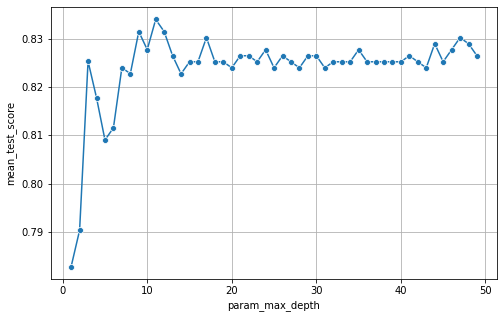

In [49]:
# 튜닝과정 시각화
plt.figure(figsize=(8,5))
sns.lineplot(x='param_max_depth', y = 'mean_test_score', data = df, marker='o')
plt.grid()
plt.show()

In [59]:
# 변수 중요도
# result = plot_feature_importance(model.feature_importances_, list(x)) -> grid, random search를 해주면 사용 불가

In [50]:
model_dt.best_estimator_

DecisionTreeClassifier(max_depth=11)

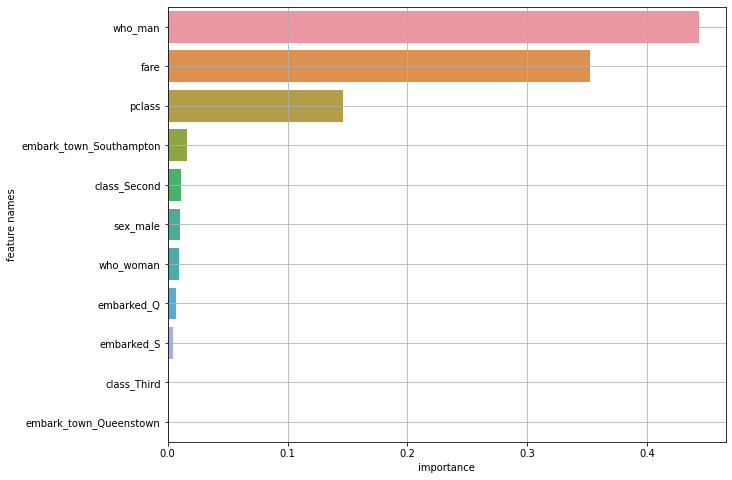

In [56]:
# 함수를 이용하는 방법 -> 함수를 선언해줘야 사용 가능
fi = model_dt.best_estimator_.feature_importances_
fl_show = plot_feature_importance(fi, list(x_train))

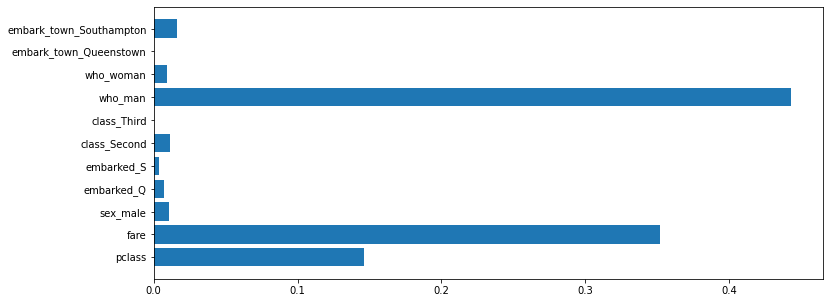

In [62]:
# 일반적인 방법법
plt.figure(figsize=(12, 5))
plt.barh(list(x_train), model_dt.best_estimator_.feature_importances_)
plt.show()

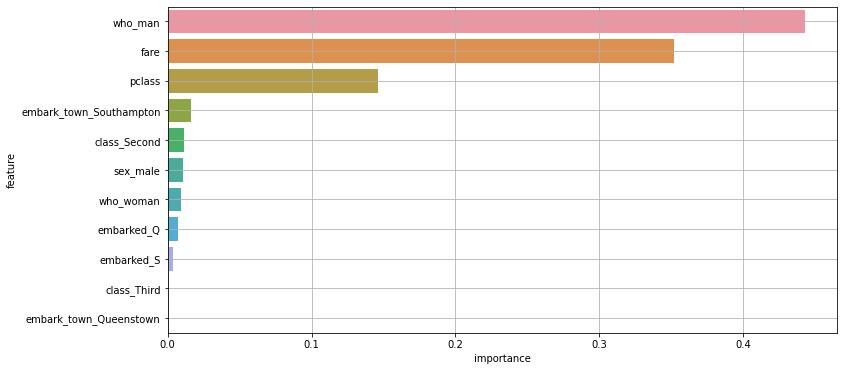

In [65]:
# 위 방법에서 크기순으로 정렬
df = pd.DataFrame({'feature':list(x_train),
                   'importance':model_dt.best_estimator_.feature_importances_})
df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=df)
plt.grid()
plt.show()

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

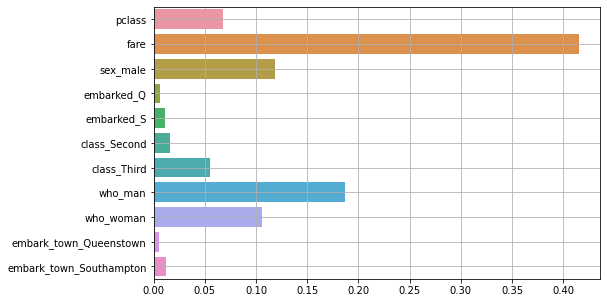

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(x=model_rf.feature_importances_, y = list(x_train))
plt.grid()
plt.show()